In [6]:
# importing libraries

import cv2
import numpy as np
import onnx
import matplotlib.pyplot as plt

In [7]:
video = cv2.VideoCapture(0)

face_classifier = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
net = cv2.dnn.readNetFromONNX('resnet18_luca2.onnx')
mean = np.array([0.485, 0.456, 0.406]) * 255.0
scale = 1 / 255.0
std = [0.229, 0.224, 0.225]


while(video.isOpened()):
    check, frame = video.read()
    if frame is not None:
        img = frame.copy()
        
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        faces = face_classifier.detectMultiScale(gray_img)
        
        
        
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
        
            input_blob = cv2.dnn.blobFromImage(
                        image=img,
                        scalefactor=scale,
                        size=(224, 224),  # img target size
                        mean=mean,
                        swapRB=True,  # BGR -> RGB
                        crop=True  # center crop
                        )
            input_blob[0] /= np.asarray(std, dtype=np.float32).reshape(3, 1, 1)
            
            
            net.setInput(input_blob)
            out = net.forward()
            out = np.exp(out)
            
            net_class_id = np.argmin(out)
            net_labels = ['MASK', 'NO_MASK', 'BAD MASK']
        
            cv2.putText(img, f'{net_labels[net_class_id]}', (100,100), cv2.FONT_HERSHEY_COMPLEX, 3, (0,0,0), 2, cv2.LINE_AA)
        
        cv2.imshow('frame',img)        
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    else:
        break


video.release()
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\dnn\src\dnn.cpp:518: error: (-2:Unspecified error) Can't create layer "output" of type "LogSoftmax" in function 'cv::dnn::dnn4_v20181221::LayerData::getLayerInstance'


[[9.9912971e-01 8.7027898e-04 1.7887857e-08]]
OpenCV DNN prediction: 

* shape:  (1, 3)
* class ID: 0, label: MASK
* confidence: 0.9991


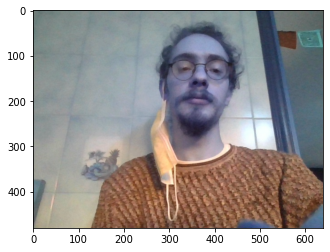

In [4]:
opencv_net = cv2.dnn.readNetFromONNX('./models/resnet18_luca2.onnx')



image_mask = cv2.imread('./dataset/mask/luca_1616408746.jpg')
img_mask_org = image_mask.copy()
image_mask = image_mask.astype(np.float32)
image_mask = cv2.resize(image_mask, (256, 256))

image_no_mask = cv2.imread('./dataset/no_mask/luca_1616408034.jpg')
img_nomask_org = image_no_mask.copy()
image_no_mask = image_no_mask.astype(np.float32)
image_no_mask = cv2.resize(image_no_mask, (256, 256))

image_bad_mask = cv2.imread('./dataset/bad_mask/luca_1616409455.jpg')
img_badmask_org = image_bad_mask.copy()
image_bad_mask = image_bad_mask.astype(np.float32)
image_bad_mask = cv2.resize(image_bad_mask, (256, 256))

# define preprocess parameters
mean = np.array([0.485, 0.456, 0.406]) * 255.0
scale = 1 / 255.0
std = [0.229, 0.224, 0.225]


# preparing blob
input_blob = cv2.dnn.blobFromImage(
    image=image_mask,
    scalefactor=scale,
    size=(224, 224),  # img target size
    mean=mean,
    swapRB=True,  # BGR -> RGB
    crop=True  # center crop
)

# 3. divide by std
input_blob[0] /= np.asarray(std, dtype=np.float32).reshape(3, 1, 1)

# set OpenCV DNN input
opencv_net.setInput(input_blob)

# OpenCV DNN inference
out = opencv_net.forward()
out = np.exp(out)
print(out)
print("OpenCV DNN prediction: \n")
print("* shape: ", out.shape)
# get the predicted class ID
net_class_id = np.argmax(out)
net_labels = ['MASK', 'NO_MASK', 'BAD MASK']

# get confidence
confidence = out[0][net_class_id]
print("* class ID: {}, label: {}".format(net_class_id, net_labels[net_class_id]))
print("* confidence: {:.4f}".format(confidence))
plt.imshow(img_badmask_org)

In [17]:
opencv_net = cv2.dnn.readNetFromONNX('./models/resnet18_luca2.onnx')

# read the image
input_img = cv2.imread('./dataset/mask/luca_1616408746.jpg', cv2.IMREAD_COLOR)
input_img = input_img.astype(np.float32)
input_img = cv2.resize(input_img, (256, 256))


# define preprocess parameters
mean = np.array([0.485, 0.456, 0.406]) * 255.0
scale = 1 / 255.0
std = [0.229, 0.224, 0.225]


# prepare input blob to fit the model input:
# 1. subtract mean
# 2. scale to set pixel values from 0 to 1


input_blob = cv2.dnn.blobFromImage(
    image=input_img,
    scalefactor=scale,
    size=(224, 224),  # img target size
    mean=mean,
    swapRB=True,  # BGR -> RGB
    crop=True  # center crop
)



# 3. divide by std
input_blob[0] /= np.asarray(std, dtype=np.float32).reshape(3, 1, 1)


# set OpenCV DNN input
opencv_net.setInput(input_blob)


# OpenCV DNN inference
out = opencv_net.forward()
print("OpenCV DNN prediction: \n")
print("* shape: ", out.shape)
# get the predicted class ID
net_class_id = np.argmax(out)
net_labels = ['MASK', 'NO_MASK']

# get confidence
confidence = out[0][imagenet_class_id]
print("* class ID: {}, label: {}".format(net_class_id, net_labels[net_class_id]))
print("* confidence: {:.4f}".format(confidence))

OpenCV DNN prediction: 

* shape:  (1, 3)
* class ID: 0, label: MASK
* confidence: -0.0009
